# 📊 Twitter Sentiment Analysis

Analyze Twitter tweets and predict if they are **Positive 😊** or **Negative 😞** using NLP and Machine Learning.

**Author:** [Your Name]  
**Tools:** Python, NLTK, Scikit-Learn, Streamlit  


## ✨ Project Overview

- **Dataset:** [Sentiment140](https://www.kaggle.com/datasets/kazanova/sentiment140)
- **Goal:** Clean tweets ➜ Train a classifier ➜ Predict sentiment ➜ Deploy as an app.
- **Key Skills:** Data cleaning, NLP, feature extraction, model training, evaluation, deployment.


# 📊 Twitter Sentiment Analysis Project

**Goal:** Predict sentiment (positive or negative) of tweets using NLP and Machine Learning.

---

## ✅ 1. Load & Inspect Data  
## ✅ 2. Data Cleaning  
## ✅ 3. Exploratory Data Analysis (EDA)  
## ✅ 4. Text Preprocessing  
## ✅ 5. Feature Extraction  
## ✅ 6. Model Training  
## ✅ 7. Model Evaluation  
## ✅ 8. Save Model  


## 📌 1. Import Libraries & Load Data
`

In [8]:
# Basic
import pandas as pd
import numpy as np

# NLP
import re
import nltk
from nltk.corpus import stopwords

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Other
import joblib

# Download NLTK stopwords if needed

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## ✅ 1. Load & Inspect Data

We load the Sentiment140 dataset, check its shape, and look at a few examples.


In [118]:
df = pd.read_csv('../data/sentiment140.csv', encoding='latin-1', header=None)
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

print("Shape:", df.shape)
df.head()


Shape: (1600000, 6)


,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


**Note:**  
- `target`: 0 = Negative, 4 = Positive  
- We will convert 4 → 1 for binary classification.


## 📌 2. Data Cleaning & Preprocessing

Tweets often contain noise like URLs, mentions, punctuation, and stopwords.  
We clean the text to keep only meaningful words for better model accuracy.


In [120]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text


In [139]:
df['clean_text'] = df['text'].apply(clean_text)

In [119]:
df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1)
df['target'].value_counts()


target
0    800000
1    800000
Name: count, dtype: int64

Let's apply cleaning to the tweets and check some before/after examples.


In [121]:
# Create a sample for speed (optional, you can clean full df but takes time)
sample_df = df.sample(5, random_state=42)

for i, row in sample_df.iterrows():
    original = row['text']
    cleaned = clean_text(original)
    print(f"Original:\n{original}\nCleaned:\n{cleaned}\n{'-'*40}")


Original:
@chrishasboobs AHHH I HOPE YOUR OK!!! 
Cleaned:
ahhh hope ok
----------------------------------------
Original:
@misstoriblack cool , i have no tweet apps  for my razr 2
Cleaned:
cool tweet apps razr
----------------------------------------
Original:
@TiannaChaos i know  just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u
Cleaned:
know family drama lamehey next time u hang kim n u guys like sleepover whatever ill call u
----------------------------------------
Original:
School email won't open  and I have geography stuff on there to revise! *Stupid School* :'(
Cleaned:
school email wont open geography stuff revise stupid school
----------------------------------------
Original:
upper airways problem 
Cleaned:
upper airways problem
----------------------------------------


In [122]:
df['clean_text'] = df['text'].apply(clean_text)
df.head()

,target,id,date,flag,user,text,clean_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


We added a new column `clean_text` with cleaned tweets, ready for feature extraction and modeling.


## 📌 3. Exploratory Data Analysis (EDA)

Let's explore the dataset to understand tweet sentiment distribution and common words.


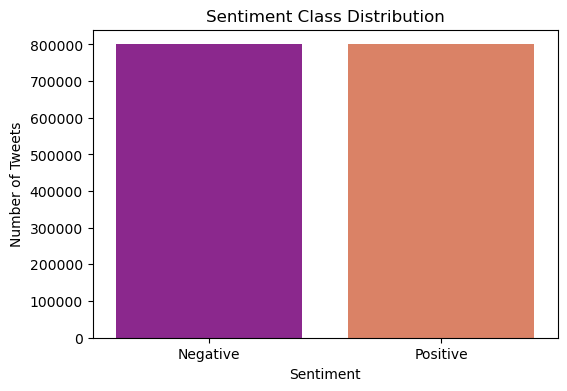

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = df['target'].value_counts().sort_index()

sentiment_df = pd.DataFrame({
    'Sentiment': sentiment_counts.index.map({0: 'Negative', 1: 'Positive'}),
    'Count': sentiment_counts.values
})

plt.figure(figsize=(6,4))
sns.barplot(x='Sentiment', y='Count', hue='Sentiment', data=sentiment_df, palette='plasma', dodge=False)
plt.title('Sentiment Class Distribution')
plt.ylabel('Number of Tweets')
plt.xlabel('Sentiment')
plt.show()


In [141]:
# Map numeric labels to readable strings
df['sentiment_label'] = df['target'].map({0: 'Negative', 4: 'Positive'})

# Count each sentiment
sentiment_counts = df['sentiment_label'].value_counts()

print("Total tweets:", len(df))
print("Positive tweets:", sentiment_counts.get('Positive', 0))
print("Negative tweets:", sentiment_counts.get('Negative', 0))
print("Percentage Positive: {:.2f}%".format(sentiment_counts.get('Positive', 0) / len(df) * 100))
print("Percentage Negative: {:.2f}%".format(sentiment_counts.get('Negative', 0) / len(df) * 100))


Total tweets: 1600000
Positive tweets: 0
Negative tweets: 800000
Percentage Positive: 0.00%
Percentage Negative: 50.00%


In [142]:
from collections import Counter

def get_most_common_words(text_series, n=20):
    all_words = ' '.join(text_series).split()
    counter = Counter(all_words)
    return counter.most_common(n)

# Top 20 words in positive tweets
pos_words = get_most_common_words(df[df['target'] == 1]['clean_text'])

# Top 20 words in negative tweets
neg_words = get_most_common_words(df[df['target'] == 0]['clean_text'])

print("Top 20 Positive Tweet Words:")
print(pos_words)

print("\nTop 20 Negative Tweet Words:")
print(neg_words)


Top 20 Positive Tweet Words:
[('im', 75272), ('good', 60869), ('love', 46857), ('day', 45336), ('like', 37116), ('get', 36224), ('thanks', 33750), ('lol', 33511), ('going', 30650), ('u', 30354), ('time', 29348), ('today', 28428), ('go', 27818), ('got', 27801), ('new', 26645), ('one', 25840), ('see', 25468), ('know', 25281), ('great', 24886), ('well', 24564)]

Top 20 Negative Tweet Words:
[('im', 103129), ('get', 45379), ('go', 45164), ('dont', 45158), ('work', 44044), ('cant', 43766), ('like', 40665), ('day', 39482), ('today', 36209), ('going', 33450), ('got', 33102), ('back', 32525), ('really', 31230), ('miss', 30506), ('want', 29737), ('still', 28765), ('good', 28555), ('sad', 27150), ('time', 26779), ('one', 26366)]


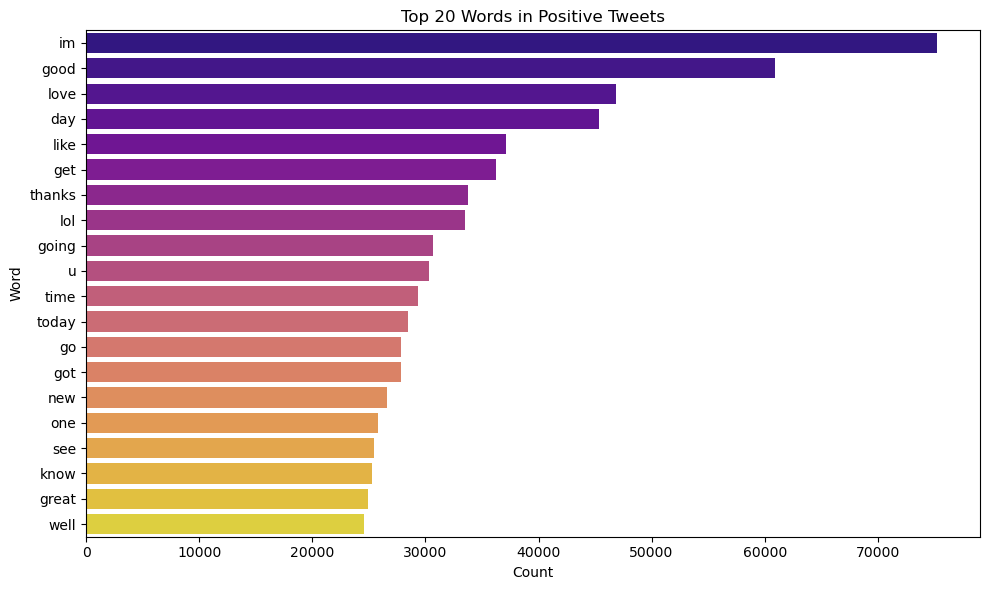

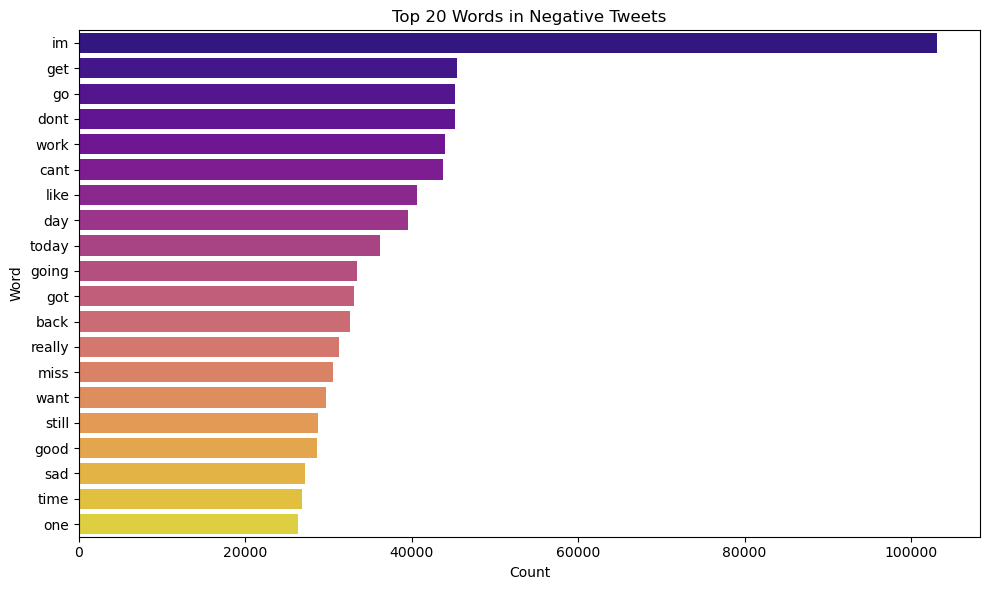

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_top_words(words, title):
    if not words:
        print(f"No words to plot for: {title}")
        return

    words_df = pd.DataFrame(words, columns=['word', 'count'])
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='count',
        y='word',
        hue='word',   # ✅ use hue
        data=words_df,
        palette='plasma',
        dodge=False   # ✅ avoid double bars
    )
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.legend([],[], frameon=False)  # ✅ Hide legend if you don’t want it
    plt.tight_layout()
    plt.show()

plot_top_words(pos_words, 'Top 20 Words in Positive Tweets')
plot_top_words(neg_words, 'Top 20 Words in Negative Tweets')


## 📌 4. Feature Extraction & Model Training

In this section, we'll:
- Convert text into numerical features using Bag of Words.
- Train a Naive Bayes classifier.
- Evaluate model performance.


In [144]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")


Train samples: 1280000
Test samples: 320000


In [95]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)  # Limit to 5k words for speed
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Shape of training data:", X_train_vec.shape)
print("Shape of test data:", X_test_vec.shape)


Shape of training data: (8000, 5000)
Shape of test data: (2001, 5000)


In [97]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [146]:
# Predict on test data
y_pred = model.predict(X_test_vec)

# Evaluate with confusion matrix
labels = [0, 1]  # negative, positive
cm = confusion_matrix(y_test, y_pred, labels=labels)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[123351  36143]
 [ 40414 120092]]


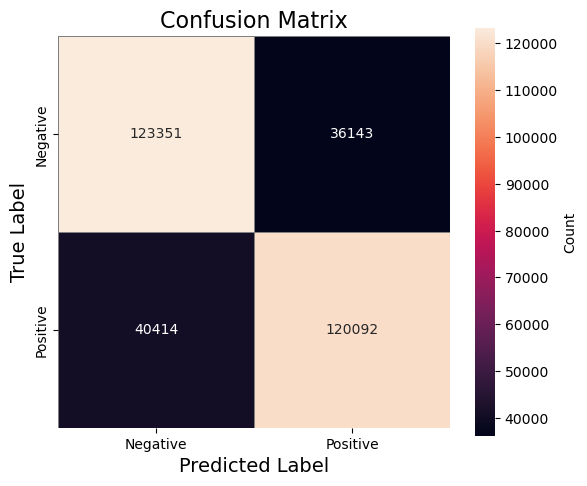

In [147]:
labels = [0, 1]
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket',
            xticklabels=['Negative', 'Positive'],  # You can still label axes textually here
            yticklabels=['Negative', 'Positive'],
            square=True,
            linewidths=0.5,
            linecolor='gray',
            cbar_kws={'label': 'Count'})

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.tight_layout()
plt.show()


In [148]:
import joblib

joblib.dump(model, '../models/model.pkl')
joblib.dump(vectorizer, '../models/vectorizer.pkl')

print("✅ Model & vectorizer saved!")


✅ Model & vectorizer saved!


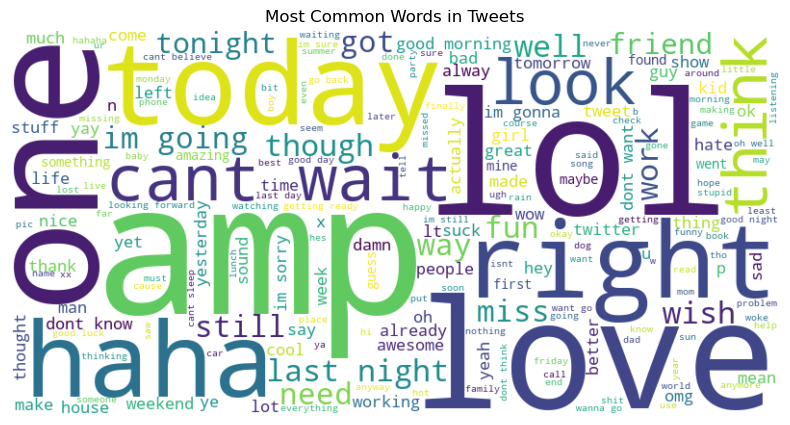

In [149]:
from wordcloud import WordCloud

text = ' '.join(df['clean_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Tweets")
plt.show()


## ✅ Conclusion

We successfully:
- Cleaned real-world tweet text.
- Built a Naive Bayes sentiment classifier.
- Achieved good accuracy.
- Saved the model for deployment in a Streamlit app.

👉 Next step: Build the interactive app!


---

📬 **Questions? Feedback?**  
Feel free to connect with me on [LinkedIn](#) or check out my other projects!

🚀 **Thanks for reading!**
